In [3]:
import pandas as pd
import sqlite3

In [5]:
# Step 1: Load CSV into Pandas
df = pd.read_csv("ecommerce_orders.csv")

# # Step 2: Create a SQLite connection (creates a new db file)
conn = sqlite3.connect("ecommerce.db")

# Step 3: Write DataFrame to SQLite table
df.to_sql("orders", conn, if_exists="replace", index=False)

print("✅ Data loaded into SQLite successfully!")

✅ Data loaded into SQLite successfully!


In [3]:
query = "SELECT * FROM orders LIMIT 10"
result = pd.read_sql_query(query, conn)
print(result)

   order_id  user_id  product_id     category   price  qty  total_price  \
0    100000      861         201       Sports   93.11    2       186.22   
1    100001     1295         366         Home  101.09    1       101.09   
2    100002     1131         115  Electronics  253.61    1       253.61   
3    100003     1096         159     Clothing   11.73    2        23.46   
4    100004     1639          42  Electronics  743.98    2      1487.96   
5    100005     2170         247         Toys   19.18    1        19.18   
6    100006      467          68      Grocery    7.60    1         7.60   
7    100007     1239         445        Books   31.17    1        31.17   
8    100008      331         445       Beauty   64.26    2       128.52   
9    100009     1483         326         Home  382.34    1       382.34   

            order_date         country customer_segment  
0  2024-10-30 16:07:37          Brazil        Mid-Value  
1  2022-04-17 09:31:40          Canada        Low-Value  


In [ ]:
#Total number of orders
query = "SELECT count(order_id) AS total_number_orders " \
        "FROM orders"
result = pd.read_sql_query(query, conn)
print(result)

   total_number_orders
0                10000


In [7]:
#Total revenue
query = "SELECT sum(total_price) as revenue FROM orders"
result = pd.read_sql_query(query,conn)
print(result)

      revenue
0  1595831.17


In [ ]:
#Top 5 products by order count
query = """
        SELECT product_id,category, count(order_id) AS order_count
        FROM orders
        GROUP BY product_id
        ORDER BY order_count desc limit 5
        """
result = pd.read_sql_query(query,conn)
print(result)

   product_id     category  order_count
0          13      Grocery           34
1         271      Grocery           33
2         475  Electronics           32
3         464  Electronics           31
4         333     Clothing           31


In [7]:
#Revenue trend over time (e.g., by month)
query = """
        SELECT strftime('%Y-%m',order_date) AS order_month,
        sum(total_price) as monthly_revenue
        FROM orders
        GROUP BY order_month
        ORDER BY order_month
        """
result = pd.read_sql_query(query,conn)
print(result)

   order_month  monthly_revenue
0      2022-01         40214.24
1      2022-02         28103.94
2      2022-03         38688.52
3      2022-04         37107.41
4      2022-05         34712.34
5      2022-06         41572.03
6      2022-07         34269.63
7      2022-08         39541.93
8      2022-09         32471.64
9      2022-10         30443.09
10     2022-11         36884.14
11     2022-12         33864.54
12     2023-01         46621.65
13     2023-02         40678.38
14     2023-03         38630.41
15     2023-04         41618.00
16     2023-05         42726.98
17     2023-06         33951.28
18     2023-07         31822.55
19     2023-08         43276.85
20     2023-09         37564.02
21     2023-10         29545.44
22     2023-11         42422.99
23     2023-12         39393.26
24     2024-01         45995.45
25     2024-02         39015.99
26     2024-03         35843.36
27     2024-04         30025.00
28     2024-05         34865.96
29     2024-06         28878.44
30     2

In [16]:
#Average order value
query = """
        SELECT (SUM(total_price) * 1.0 / COUNT(order_id)) AS avg_order_value
        FROM orders;
        """
result = pd.read_sql_query(query,conn)
print(result)

   avg_order_value
0       159.583117


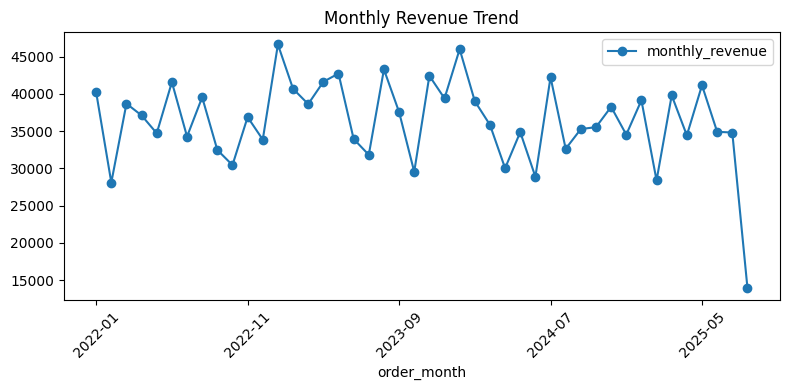

In [10]:
import matplotlib.pyplot as plt

monthly = pd.read_sql_query(query, conn)

monthly.plot(x='order_month', y='monthly_revenue', kind='line', figsize=(8,4), marker='o')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_trend.png")
plt.show()
